In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
# cluster         0
# many hotels + high total = Cluster 1
# many pubs = cluster 2
# Cluster 3 = a little
# Cluster 4 - almost nothing


In [3]:
Lfinalm = pd.read_csv('NLkNNwso.csv')

In [4]:
Lfinalm.head(5)

,Neighborhood,American Restaurant,Bar,Bus Stop,Cafe,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Deli / Bodega,...,Indian Restaurant,Mexican Restaurant,Park,Pharmacy,Pizza Place,Pub,Sandwich Place,Supermarket,Wine Shop,Cluster Labels
0,Arden Heights,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1,Arlington,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Bayswater,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Bergen Beach,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bloomfield,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
Lfinalm['Cluster Labels'].value_counts()

2    405
0     80
1     56
4     39
3     35
Name: Cluster Labels, dtype: int64

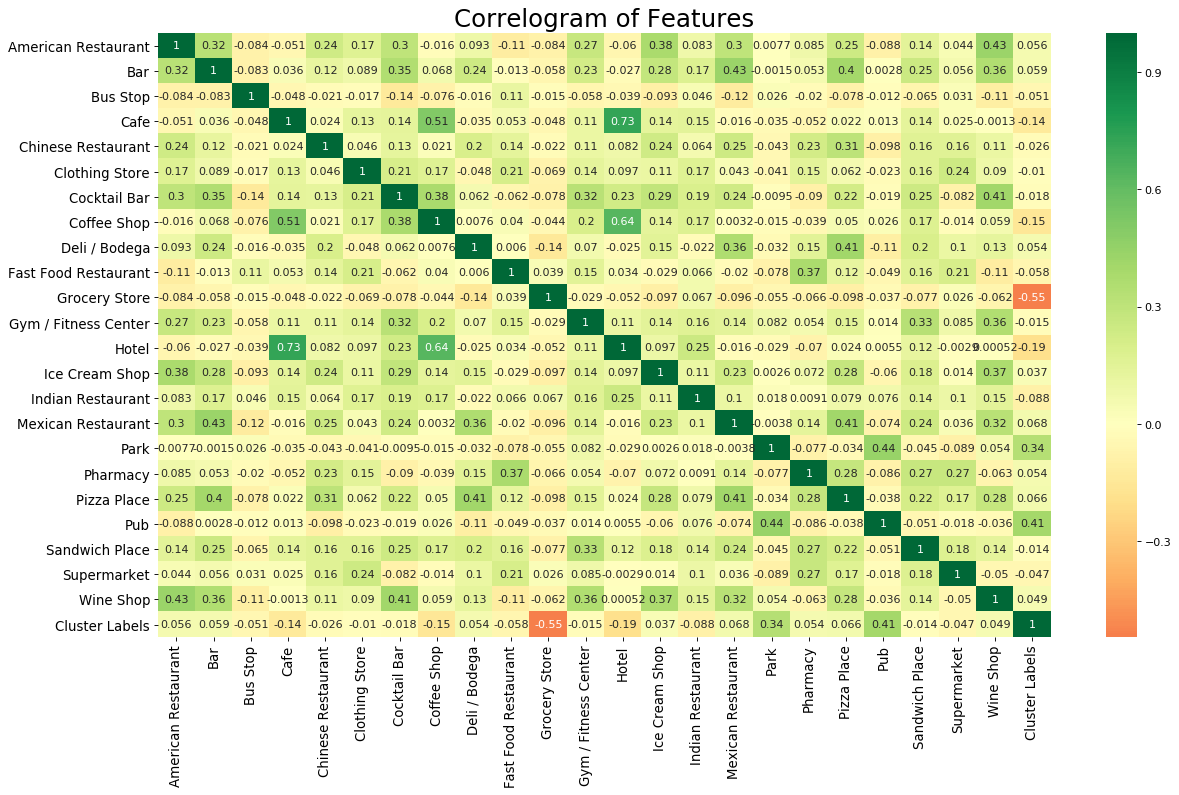

In [6]:
import seaborn as sns

# Plot
plt.figure(figsize=(18,10), dpi= 80)
sns.heatmap(Lfinalm.corr(), xticklabels=Lfinalm.corr().columns, yticklabels=Lfinalm.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [7]:
#Lets define feature sets, X:
Lfinalm.columns.tolist()

['Neighborhood',
 'American Restaurant',
 'Bar',
 'Bus Stop',
 'Cafe',
 'Chinese Restaurant',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Deli / Bodega',
 'Fast Food Restaurant',
 'Grocery Store',
 'Gym / Fitness Center',
 'Hotel',
 'Ice Cream Shop',
 'Indian Restaurant',
 'Mexican Restaurant',
 'Park',
 'Pharmacy',
 'Pizza Place',
 'Pub',
 'Sandwich Place',
 'Supermarket',
 'Wine Shop',
 'Cluster Labels']

In [8]:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array (without y) :

X = Lfinalm[[
'American Restaurant',
 'Bar',
 'Bus Stop',
 'Cafe',
 'Chinese Restaurant',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Deli / Bodega',
 'Fast Food Restaurant',
 'Grocery Store',
 'Gym / Fitness Center',
 'Hotel',
 'Ice Cream Shop',
 'Indian Restaurant',
 'Mexican Restaurant',
 'Park',
 'Pharmacy',
 'Pizza Place',
 'Pub',
 'Sandwich Place',
 'Supermarket',
 'Wine Shop']] .values  #.astype(float)
X[0:5]

array([[ 0,  0,  1,  0,  0,  0,  0,  1,  0,  0, 10,  0,  0,  0,  0,  0,
         0,  1,  1,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0]])

In [9]:
#What are our labels?
y = Lfinalm['Cluster Labels'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [10]:
#Normalize Data
#Data Standardization give data zero mean and unit variance, it is good practice,
#especially for algorithms such as KNN which is based on distance of cases:

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.36234512, -0.4816638 ,  0.88288497, -0.27390694, -0.58053006,
        -0.3478726 , -0.37967529, -0.22319294, -0.56750293, -0.52431668,
         1.1614096 , -0.5507484 , -0.24353956, -0.47921951, -0.51831415,
        -0.40455436, -0.29781682,  0.83657305, -0.03922813, -0.29589313,
        -0.62695535, -0.59133835, -0.34396924],
       [ 0.86882752, -0.4816638 ,  0.88288497, -0.27390694, -0.58053006,
        -0.3478726 , -0.37967529, -0.33170176,  0.43253805, -0.52431668,
        -0.38764029, -0.5507484 , -0.24353956, -0.47921951, -0.51831415,
        -0.40455436, -0.29781682, -0.59655348, -0.81746352, -0.29589313,
        -0.62695535, -0.59133835, -0.34396924],
       [-0.36234512, -0.4816638 , -0.48137196, -0.27390694, -0.58053006,
        -0.3478726 , -0.37967529, -0.33170176, -0.56750293, -0.52431668,
        -0.38764029, -0.5507484 , -0.24353956, -0.47921951, -0.51831415,
        -0.40455436, -0.04448716, -0.59655348, -0.81746352, -0.29589313,
        -0.62695535, -0.5913

In [11]:
# Use Scikit-learn function to split dataset into training and testing data.
# Setting ‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results.
# Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (430, 23) (430,)
Test set: (185, 23) (185,)


In [12]:
#Import library
#Classifier implementing the k-nearest neighbors vote.

from sklearn.neighbors import KNeighborsClassifier

In [13]:
#Training
#Lets start the algorithm:

k = 5

# Build and Train Model and Predict 
# Create KNN classifier
# To train the model we will use the ‘fit’ function and pass in our training data as parameters to fit our model
# to the training data.

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
# Predicting - use the model to predict the test set:
# Once the model is trained, we can use the ‘predict’ function on our model to make predictions on our test data.

yhat = neigh.predict(X_test)
yhat[0:5]

# show first 5 model predictions on the test data

array([0, 2, 2, 2, 2])

In [15]:
# Accuracy evaluation
# In multilabel classification, accuracy classification score is a function that computes subset accuracy.
# This function is equal to the jaccard_similarity_score function. 
# Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.858139534883721
Test set Accuracy:  0.8108108108108109


In [16]:
#K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User.
#So, how can we choose right value for K? The general solution is to reserve a part of your data for testing
#the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy 
#of prediction using all samples in your test set. Repeat this process, increasing the k, and see which
#k is the best for your model.

#We can calculate the accuracy of KNN for different Ks.

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.80540541, 0.77837838, 0.80540541, 0.8       , 0.81081081,
       0.84864865, 0.82702703, 0.83243243, 0.82702703])

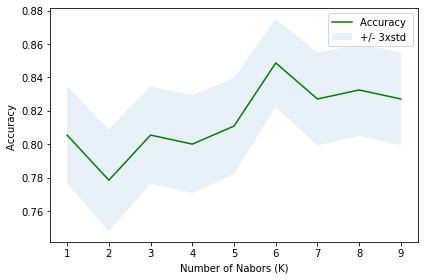

In [17]:
#Plot model accuracy for Different number of Neighbors

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8486486486486486 with k= 6


In [19]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)

# 2-Dimensions
X_train[:5]

array([[-0.6017305 , -0.13044361],
       [-0.4147416 , -0.13959626],
       [-1.85466945, -0.10003923],
       [-1.5925648 , -0.15659879],
       [-1.41738138, -0.06060803]])

In [20]:
from sklearn.neighbors import KNeighborsClassifier

k = 6

knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [21]:
y_predict = knn_model.predict(X_test)
y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3,
       2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 3, 2, 2,
       2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 0, 3, 2, 2, 1, 2, 2, 1, 2,
       2, 4, 2, 0, 0, 3, 2, 1, 2])

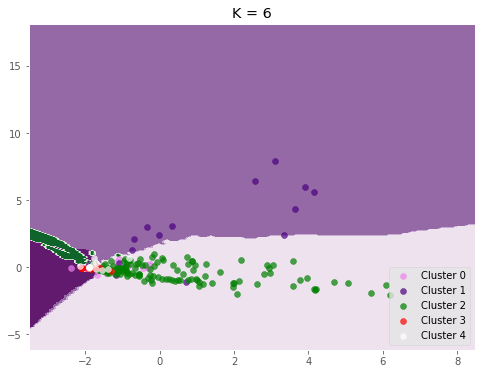

In [22]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot') 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {0: 'violet', 1: 'indigo', 2: 'green', 3: 'red', 4: 'white'}
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.7, 
                label='Cluster {}'.format(label))

plt.legend(loc='lower right')
plt.title('K = {}'.format(k))
plt.show()

In [23]:
Toselect = pd.read_csv('Toselect.csv')

In [24]:
Toselect.head()

,Neighborhood,American Restaurant,Asian Restaurant,Bakery,Bar,Beer Bar,Bookstore,Boutique,Breakfast Spot,Brewery,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Chinatown, Grange Park, Kensington Market",0,0,3,4,1,0,0,0,0,...,0,0,5,0,0,3,1,0,0,0
1,"First Canadian Place, Underground city",0,2,3,3,2,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
2,St. James Town,0,0,4,0,2,1,0,3,0,...,0,0,1,0,0,0,0,0,0,1


In [25]:
Toselect.shape

(3, 225)

In [26]:
z = Toselect[[
 'American Restaurant',
 'Bar',
 'Bus Stop',
 'Cafe',
 'Chinese Restaurant',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Deli / Bodega',
 'Fast Food Restaurant',
 'Grocery Store',
 'Gym / Fitness Center',
 'Hotel',
 'Ice Cream Shop',
 'Indian Restaurant',
 'Mexican Restaurant',
 'Park',
 'Pharmacy',
 'Pizza Place',
 'Pub',
 'Sandwich Place',
 'Supermarket',
 'Wine Shop']] .values  #.astype(float)
z[2]

array([ 0,  0,  0, 18,  0,  2,  3, 18,  0,  1,  1,  0, 15,  0,  1,  0,  2,
        0,  2,  0,  0,  0,  0])

In [27]:
# make a prediction for an out-of-sample observation

predicted= neigh.predict([[0,  0,  0, 18,  0,  2,  3, 18,  0,  1,  1,  0, 15,  0,  1,  0,  2,
        0,  2,  0,  0,  0,  0]]) 


print("St. James Town in Toronto is in Cluster"), print(predicted)

St. James Town in Toronto is in Cluster
[1]


(None, None)